In [7]:
!pip install kmapper umap torch_geometric

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import kmapper as km
from kmapper import Cover
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import DeepGraphInfomax, global_mean_pool
import pickle
import logging
import os
import umap
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import scipy.io as sio
from scipy.spatial.distance import pdist, squareform
import webbrowser
import time
import gc
from google.colab import drive
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler





In [9]:
# Mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='train')
X, y, target_names = np.array(newsgroups.data), np.array(newsgroups.target), np.array(newsgroups.target_names)
print("SAMPLE", X[0])
print("SHAPE", X.shape)
print("TARGET", target_names[y[0]])

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=2)

# Projection using TF-IDF Vectorizer, TruncatedSVD, and Isomap
projected_X = mapper.fit_transform(
    X,
    projection=[
        TfidfVectorizer(analyzer="char", ngram_range=(1, 6), max_df=0.83, min_df=0.05),
        TruncatedSVD(n_components=100, random_state=1729),
        Isomap(n_components=2, n_jobs=-1)
    ],
    scaler=[None, None, MinMaxScaler()]
)

print("PROJECTED DATA SHAPE", projected_X.shape)

# Clustering using Agglomerative Clustering
graph = mapper.map(
    projected_X,
    X=None,
    clusterer=AgglomerativeClustering(n_clusters=3, linkage="complete", affinity="cosine"),
    cover=Cover(perc_overlap=0.33)
)

# Generate interpretable features using word-based TF-IDF vectorization
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1, 3),
                      max_df=0.97,
                      min_df=0.02)

interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names_out()

print("INTERPRETABLE FEATURE SHAPE", interpretable_inverse_X.shape)
print("FEATURE NAMES SAMPLE", interpretable_inverse_X_names[:10])

# Define the path where the output HTML file will be saved
output_html_path = "/content/drive/MyDrive/DeepLearningPyTorch/Final_Project/newsgroups20.html"

# Visualize the Mapper graph with interpretable features and save it to the specified path
_ = mapper.visualize(
    graph,
    X=interpretable_inverse_X,
    X_names=interpretable_inverse_X_names,
    path_html=output_html_path,
    lens=projected_X,
    lens_names=["ISOMAP1", "ISOMAP2"],
    title="Newsgroups20: Latent Semantic Char-gram Analysis with Isometric Embedding",
    custom_tooltips=np.array([target_names[ys] for ys in y]),
    color_values=y,
    color_function_name='target'
)

print(f"Visualization saved to {output_html_path}")


SAMPLE From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





SHAPE (11314,)
TARGET rec.autos
KeplerMapper(verbose=2)
..Composing projection pipeline of length 3:
	Projections: TfidfVectorizer(analyzer='char', max_df=0.83, min_df=0.05, ngram_range=(1, 6))
		TruncatedSVD(n_components=100, random_state=1729)
		Isomap(n_jobs=-1)
	Dist

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



..Scaling with: MinMaxScaler()

PROJECTED DATA SHAPE (11314, 2)
Mapping on data shaped (11314, 2) using lens shaped (11314, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 3 clusters in hypercube 0.
   > Found 3 clusters in hypercube 1.
   > Found 3 clusters in hypercube 2.
   > Found 3 clusters in hypercube 3.
Cube_4 is empty.

   > Found 3 clusters in hypercube 5.
   > Found 3 clusters in hypercube 6.
   > Found 3 clusters in hypercube 7.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

   > Found 3 clusters in hypercube 8.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   > Found 3 clusters in hypercube 9.
   > Found 3 clusters in hypercube 10.
   > Found 3 clusters in hypercube 11.
   > Found 3 clusters in hypercube 12.
   > Found 3 clusters in hypercube 13.
   > Found 3 clusters in hypercube 14.
   > Found 3 clusters in hypercube 15.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

   > Found 3 clusters in hypercube 16.
   > Found 3 clusters in hypercube 17.
   > Found 3 clusters in hypercube 18.
   > Found 3 clusters in hypercube 19.
   > Found 3 clusters in hypercube 20.
   > Found 3 clusters in hypercube 21.
   > Found 3 clusters in hypercube 22.
   > Found 3 clusters in hypercube 23.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

   > Found 3 clusters in hypercube 24.
   > Found 3 clusters in hypercube 25.
   > Found 3 clusters in hypercube 26.
   > Found 3 clusters in hypercube 27.
   > Found 3 clusters in hypercube 28.
   > Found 3 clusters in hypercube 29.
   > Found 3 clusters in hypercube 30.
   > Found 3 clusters in hypercube 31.
   > Found 3 clusters in hypercube 32.
   > Found 3 clusters in hypercube 33.
   > Found 3 clusters in hypercube 34.
   > Found 3 clusters in hypercube 35.
   > Found 3 clusters in hypercube 36.
   > Found 3 clusters in hypercube 37.
   > Found 3 clusters in hypercube 38.
   > Found 3 clusters in hypercube 39.
   > Found 3 clusters in hypercube 40.
   > Found 3 clusters in hypercube 41.
   > Found 3 clusters in hypercube 42.
   > Found 3 clusters in hypercube 43.
   > Found 3 clusters in hypercube 44.
   > Found 3 clusters in hypercube 45.
   > Found 3 clusters in hypercube 46.
   > Found 3 clusters in hypercube 47.
   > Found 3 clusters in hypercube 48.
   > Found 3 clusters in 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi


Created 618 edges and 243 nodes in 0:00:02.560997.
INTERPRETABLE FEATURE SHAPE (11314, 947)
FEATURE NAMES SAMPLE ['00' '000' '10' '100' '11' '12' '13' '14' '15' '16']
Wrote visualization to: /content/drive/MyDrive/DeepLearningPyTorch/Final_Project/newsgroups20.html
Visualization saved to /content/drive/MyDrive/DeepLearningPyTorch/Final_Project/newsgroups20.html


In [11]:
def extract_node_clusters(graph):
    clusters = {}
    for node_id, node_data in graph['nodes'].items():
        # node_data contains indices of data points in the cluster
        clusters[node_id] = node_data
    return clusters



def convert_nx_to_pyg_with_metadata(nx_graph, clusters):

    # Convert NetworkX to PyTorch Geometric graph
    pyg_graph = from_networkx(nx_graph)

    # Initialize a list for features
    x = []

    # Iterate over nodes and attach cluster metadata as features
    for node_id in nx_graph.nodes():
        if node_id in clusters:
            # Example: Use the size of the cluster as a feature
            feature_vector = torch.tensor([len(clusters[node_id])], dtype=torch.float)
            x.append(feature_vector)
        else:
            x.append(torch.tensor([0.0], dtype=torch.float))  # Fallback

    if x:
        pyg_graph.x = torch.stack(x)
    else:
        pyg_graph.x = None

    return pyg_graph


# Extract clusters
clusters = extract_node_clusters(graph)

# Convert kmapper graph to NetworkX
nx_graph = km.adapter.to_nx(graph)

# Convert and include metadata
pyg_graph = convert_nx_to_pyg_with_metadata(nx_graph, clusters)



In [25]:
# Set up logging to file
logging.basicConfig(filename='training_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class GCNEncoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels)
        self.conv2 = GCNConv(2 * out_channels, out_channels)

    def forward(self, x, edge_index, batch=None):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

class DGI(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(DGI, self).__init__()
        self.encoder = GCNEncoder(in_channels, hidden_channels)
        self.dgi = DeepGraphInfomax(
            hidden_channels=hidden_channels,
            encoder=self.encoder,
            summary=lambda z, *args, **kwargs: torch.sigmoid(z.mean(dim=0)),
            corruption=self.corruption
        )
        self.lin = nn.Linear(hidden_channels, out_channels)

    def corruption(self, x, edge_index, batch=None):
        # Corrupt features by shuffling the nodes
        corrupted_x = x[torch.randperm(x.size(0))]
        return corrupted_x, edge_index

    def forward(self, x, edge_index, batch=None):
        z, nll, _ = self.dgi(x, edge_index, batch)
        return self.lin(z), z, nll

# Initialize model
in_channels = pyg_graph.num_node_features
hidden_channels = 64
out_channels = 1  # We are looking for anomalies

model = DGI(in_channels, hidden_channels, out_channels)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = pyg_graph.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def train():
    model.train()
    optimizer.zero_grad()
    _, _, nll = model(data.x, data.edge_index)
    loss = F.relu(nll).mean()
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop (logging)
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        log_message = f'Epoch {epoch}, Loss: {loss:.4f}'
        logging.info(log_message)
        print(log_message)

# Save embeddings
with torch.no_grad():
    _, embeddings, _ = model(data.x, data.edge_index)


Epoch 0, Loss: 3.5079
Epoch 10, Loss: 3.2038
Epoch 20, Loss: 3.0920
Epoch 30, Loss: 2.8461
Epoch 40, Loss: 2.6117
Epoch 50, Loss: 2.2309
Epoch 60, Loss: 2.1390
Epoch 70, Loss: 2.0609
Epoch 80, Loss: 1.8464
Epoch 90, Loss: 1.4650
Epoch 100, Loss: 1.3919
Epoch 110, Loss: 1.2484
Epoch 120, Loss: 1.1560
Epoch 130, Loss: 1.0568
Epoch 140, Loss: 0.8532
Epoch 150, Loss: 0.8283
Epoch 160, Loss: 0.6521
Epoch 170, Loss: 0.5894
Epoch 180, Loss: 0.4909
Epoch 190, Loss: 0.4002


In [13]:
# Perform k-means clustering on GNN embeddings
kmeans = KMeans(n_clusters=2)  # Two clusters, non-anomalous and anomalous clusters
kmeans.fit(embeddings.cpu().numpy())
cluster_labels = kmeans.labels_

# Identify the cluster centroids and find the distance of each point to its centroid
centroids = kmeans.cluster_centers_
_, distances = pairwise_distances_argmin_min(embeddings.cpu().numpy(), centroids)

# Anomalies can be defined as points farthest from their cluster centroid
threshold = np.percentile(distances, 95)  # For example, top 5% distances
anomalies = torch.where(torch.tensor(distances) > threshold)[0]

print(f"Detected {len(anomalies)} anomalies.")
print(f"Anomalous nodes: {anomalies.tolist()}")


Detected 13 anomalies.
Anomalous nodes: [6, 11, 15, 18, 21, 22, 23, 28, 40, 42, 45, 47, 71]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Save to a text file for analysis
anomalous_nodes = [6, 11, 15, 18, 21, 22, 23, 28, 40, 42, 45, 47, 71]

with open('anomalies.txt', 'w') as f:
    for node_id in anomalous_nodes:
        cluster_key = list(clusters.keys())[node_id]

        f.write(f"Anomalous Cluster: {cluster_key}\n")
        data_indices = clusters[cluster_key]

        for idx in data_indices:
            f.write(f"Data point {idx}: {X[idx]}\n")
        f.write("\n")


In [17]:
def intra_cluster_distance(cluster_key, X, clusters):

    data_indices = clusters[cluster_key]

    # Check if the cluster contains data
    if len(data_indices) == 0:
        return np.nan  # Return NaN if the cluster is empty

    cluster_data = X[data_indices]

    # Calculate pairwise distances within the cluster
    distances = pairwise_distances(cluster_data)
    avg_distance = np.mean(distances)

    return avg_distance

clusters = graph['nodes']

# List of anomalous clusters detected by GNN
anomalous_cluster_keys = [list(clusters.keys())[node] for node in anomalous_nodes]

anomalous_distances = []
non_anomalous_distances = []

print("Intra-cluster distances for anomalous clusters:")
for key in anomalous_cluster_keys:
    avg_distance = intra_cluster_distance(key, interpretable_inverse_X, clusters)
    if not np.isnan(avg_distance):  # Only print if the cluster is not empty
        anomalous_distances.append(avg_distance)
        print(f"Cluster {key}: Average Distance = {avg_distance:.4f}")
    else:
        print(f"Cluster {key} is empty.")

print("\nIntra-cluster distances for non-anomalous clusters:")
non_anomalous_cluster_keys = [key for key in clusters.keys() if key not in anomalous_cluster_keys]

for key in non_anomalous_cluster_keys:
    avg_distance = intra_cluster_distance(key, interpretable_inverse_X, clusters)
    if not np.isnan(avg_distance):  # Only print if the cluster is not empty
        non_anomalous_distances.append(avg_distance)
        print(f"Cluster {key}: Average Distance = {avg_distance:.4f}")
    else:
        print(f"Cluster {key} is empty.")

# Calculate mean and variance for both groups
anomalous_mean = np.mean(anomalous_distances)
anomalous_variance = np.var(anomalous_distances)

non_anomalous_mean = np.mean(non_anomalous_distances)
non_anomalous_variance = np.var(non_anomalous_distances)

print("\nStatistics for Anomalous Clusters:")
print(f"Mean Intra-cluster Distance: {anomalous_mean:.4f}")
print(f"Variance of Intra-cluster Distances: {anomalous_variance:.4f}")

print("\nStatistics for Non-Anomalous Clusters:")
print(f"Mean Intra-cluster Distance: {non_anomalous_mean:.4f}")
print(f"Variance of Intra-cluster Distances: {non_anomalous_variance:.4f}")


Intra-cluster distances for anomalous clusters:
Cluster cube2_cluster0: Average Distance = 1.3446
Cluster cube3_cluster2: Average Distance = 1.3451
Cluster cube6_cluster0: Average Distance = 1.3191
Cluster cube7_cluster0: Average Distance = 1.3548
Cluster cube8_cluster0: Average Distance = 1.3721
Cluster cube8_cluster1: Average Distance = 1.3722
Cluster cube8_cluster2: Average Distance = 1.3531
Cluster cube10_cluster1: Average Distance = 1.3036
Cluster cube14_cluster1: Average Distance = 1.3297
Cluster cube15_cluster0: Average Distance = 1.3469
Cluster cube16_cluster0: Average Distance = 1.3759
Cluster cube16_cluster2: Average Distance = 1.3497
Cluster cube24_cluster2: Average Distance = 1.3539

Intra-cluster distances for non-anomalous clusters:
Cluster cube0_cluster0: Average Distance = 0.8262
Cluster cube0_cluster1: Average Distance = 0.6296
Cluster cube0_cluster2: Average Distance = 0.8593
Cluster cube1_cluster0: Average Distance = 1.1764
Cluster cube1_cluster1: Average Distance = 

In [18]:
# Cluster-level analysis

def calculate_cluster_dispersion(cluster_data):
    pairwise_distances = squareform(pdist(cluster_data))
    dispersion = np.mean(pairwise_distances)
    return dispersion

def calculate_purity(cluster_data, labels):
    if len(labels) == 0:
        return np.nan
    majority_vote = np.bincount(labels).max()
    purity = majority_vote / len(labels)
    return purity

def calculate_inertia(cluster_data):
    if cluster_data.size == 0:
        return np.nan
    center = np.mean(cluster_data, axis=0)
    inertia = np.sum((cluster_data - center) ** 2)
    return inertia

def calculate_cohesion(cluster_data):
    if cluster_data.size == 0:
        return np.nan
    cohesion = np.sum(pdist(cluster_data))
    return cohesion

def analyze_clusters(anomalous_keys, non_anomalous_keys, clusters, data, labels):
    results = {}

    for cluster_type, keys in zip(["Anomalous", "Non-Anomalous"], [anomalous_keys, non_anomalous_keys]):
        dispersions = []
        purities = []
        inertias = []
        cohesions = []

        for key in keys:
            if key not in clusters or len(clusters[key]) == 0:
                print(f"Skipping empty cluster: {key}")
                continue

            cluster_data = data[clusters[key]]
            cluster_labels = labels[clusters[key]]

            # Only calculate metrics if cluster_data is not empty
            if cluster_data.size == 0:
                print(f"Skipping empty cluster: {key}")
                continue

            dispersion = calculate_cluster_dispersion(cluster_data)
            purity = calculate_purity(cluster_data, cluster_labels)
            inertia = calculate_inertia(cluster_data)
            cohesion = calculate_cohesion(cluster_data)

            dispersions.append(dispersion)
            purities.append(purity)
            inertias.append(inertia)
            cohesions.append(cohesion)

        # Store the average values for each cluster type
        results[f"{cluster_type} Clusters"] = {
            "Average Dispersionsity": np.nanmean(dispersions),
            "Average Purity": np.nanmean(purities),
            "Average Inertia": np.nanmean(inertias),
            "Average Cohesion": np.nanmean(cohesions),
        }

    return results

anomalous_keys = anomalous_cluster_keys
non_anomalous_keys = non_anomalous_cluster_keys

clusters = graph['nodes']
data = interpretable_inverse_X
labels = y

results = analyze_clusters(anomalous_keys, non_anomalous_keys, clusters, data, labels)

# Print results
print("Cluster Analysis Results:")
for cluster_type, metrics in results.items():
    print(f"\n{cluster_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Cluster Analysis Results:

Anomalous Clusters:
Average Dispersionsity: 1.3477
Average Purity: 0.1518
Average Inertia: 703.5670
Average Cohesion: 1265287.8167

Non-Anomalous Clusters:
Average Dispersionsity: 1.0357
Average Purity: 0.4092
Average Inertia: 64.1171
Average Cohesion: 31105.2952


In [19]:
# Feature-level mean and standard deviations

def compute_avg_mean_std(cluster_keys, data, clusters):

    all_means = []
    all_stds = []

    for key in cluster_keys:

        # Extract data points for this cluster
        cluster_data = data[clusters[key]]

        # Skip empty clusters
        if len(cluster_data) == 0:
            continue

        # Calculate mean and standard deviation for each feature
        cluster_means = np.mean(cluster_data, axis=0)
        cluster_stds = np.std(cluster_data, axis=0)

        # Store the means and stds
        all_means.append(cluster_means)
        all_stds.append(cluster_stds)

    # Check if there are valid clusters to compute
    if len(all_means) == 0 or len(all_stds) == 0:
        return np.nan, np.nan  # Return NaN if no valid clusters

    # Calculate average mean and std across all clusters
    avg_mean = np.mean(all_means, axis=0)
    avg_std = np.mean(all_stds, axis=0)

    return avg_mean, avg_std

# Calculate for anomalous clusters
anomalous_avg_mean, anomalous_avg_std = compute_avg_mean_std(anomalous_cluster_keys, interpretable_inverse_X, clusters)
print("Anomalous Clusters - Average Mean:", np.mean(anomalous_avg_mean))
print("Anomalous Clusters - Average Std:", np.mean(anomalous_avg_std))

# Calculate for non-anomalous clusters
non_anomalous_avg_mean, non_anomalous_avg_std = compute_avg_mean_std(non_anomalous_cluster_keys, interpretable_inverse_X, clusters)
print("Non-Anomalous Clusters - Average Mean of Features:", np.mean(non_anomalous_avg_mean))
print("Non-Anomalous Clusters - Average Std of Features:", np.mean(non_anomalous_avg_std))



Anomalous Clusters - Average Mean: 0.0060597078683024145
Anomalous Clusters - Average Std: 0.026303247125276423
Non-Anomalous Clusters - Average Mean of Features: 0.00622524548455352
Non-Anomalous Clusters - Average Std of Features: 0.014847322565704008


In [20]:
def find_anomalous_features(cluster_keys, data, clusters, feature_names, top_n=10):

    anomalous_features = {}

    for key in cluster_keys:
        # Extract data points for this cluster
        cluster_data = data[clusters[key]]

        # Skip empty clusters
        if len(cluster_data) == 0:
            continue

        # Calculate variance for each feature in this cluster
        feature_variances = np.var(cluster_data, axis=0)

        # Get top N features with the highest variance
        top_features = np.argsort(feature_variances)[-top_n:][::-1]  # Indices of top N features

        # Map feature indices to feature names and their corresponding variances
        top_feature_info = [(feature_names[i], feature_variances[i]) for i in top_features]

        anomalous_features[key] = top_feature_info

    return anomalous_features

anomalous_features = find_anomalous_features(anomalous_cluster_keys, interpretable_inverse_X, clusters, interpretable_inverse_X_names, top_n=10)

# Print top ten features per anomalous cluster with highest variance
for key, features in anomalous_features.items():
    print(f"Anomalous Cluster {key}:")
    for feature_name, variance in features:
        print(f"  Feature: {feature_name}, Variance: {variance:.4f}")
    print("\n")


Anomalous Cluster cube2_cluster0:
  Feature: keith, Variance: 0.0294
  Feature: washington, Variance: 0.0248
  Feature: access, Variance: 0.0198
  Feature: cc, Variance: 0.0185
  Feature: ohio, Variance: 0.0146
  Feature: ibm, Variance: 0.0120
  Feature: netcom, Variance: 0.0120
  Feature: edu, Variance: 0.0092
  Feature: com, Variance: 0.0089
  Feature: state, Variance: 0.0083


Anomalous Cluster cube3_cluster2:
  Feature: ibm, Variance: 0.0184
  Feature: keith, Variance: 0.0184
  Feature: washington, Variance: 0.0117
  Feature: speed, Variance: 0.0112
  Feature: ohio, Variance: 0.0109
  Feature: michael, Variance: 0.0100
  Feature: jewish, Variance: 0.0099
  Feature: colorado, Variance: 0.0092
  Feature: com, Variance: 0.0089
  Feature: state, Variance: 0.0088


Anomalous Cluster cube6_cluster0:
  Feature: men, Variance: 0.0188
  Feature: israel, Variance: 0.0179
  Feature: jews, Variance: 0.0164
  Feature: god, Variance: 0.0147
  Feature: frank, Variance: 0.0139
  Feature: governmen

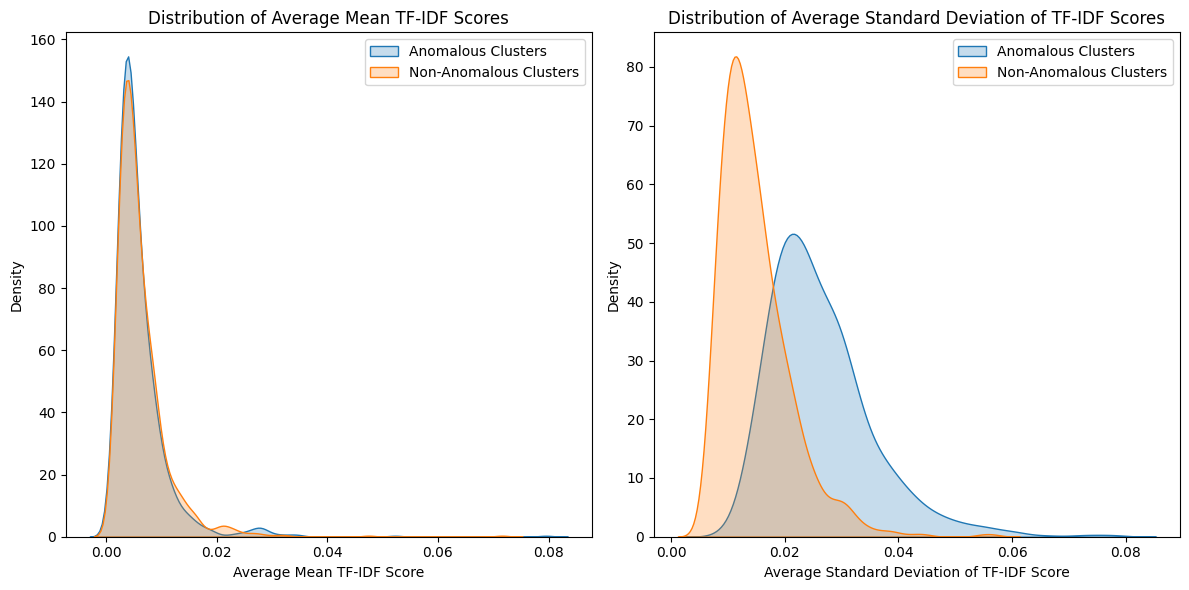

In [23]:
# KDE plots
plt.figure(figsize=(12, 6))
# Average mean distribution
plt.subplot(1, 2, 1)
sns.kdeplot(anomalous_avg_mean, label='Anomalous Clusters', fill=True)
sns.kdeplot(non_anomalous_avg_mean, label='Non-Anomalous Clusters', fill=True)
plt.title('Distribution of Average Mean TF-IDF Scores')
plt.xlabel('Average Mean TF-IDF Score')
plt.legend()

# Average standard deviation distribution
plt.subplot(1, 2, 2)
sns.kdeplot(anomalous_avg_std, label='Anomalous Clusters', fill=True)
sns.kdeplot(non_anomalous_avg_std, label='Non-Anomalous Clusters', fill=True)
plt.title('Distribution of Average Standard Deviation of TF-IDF Scores')
plt.xlabel('Average Standard Deviation of TF-IDF Score')
plt.legend()

plt.tight_layout()
plt.show()